### Iris data set
We have to classify instances in virginica or not

`(Ignore the EDA if you're here for learning about decision boundary only)`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib widget

In [2]:
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

- Three labels: ['setosa', 'versicolor', 'virginica']
- 150 instances, 4 features
- No null values

In [6]:
data.drop('species',axis=1).corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


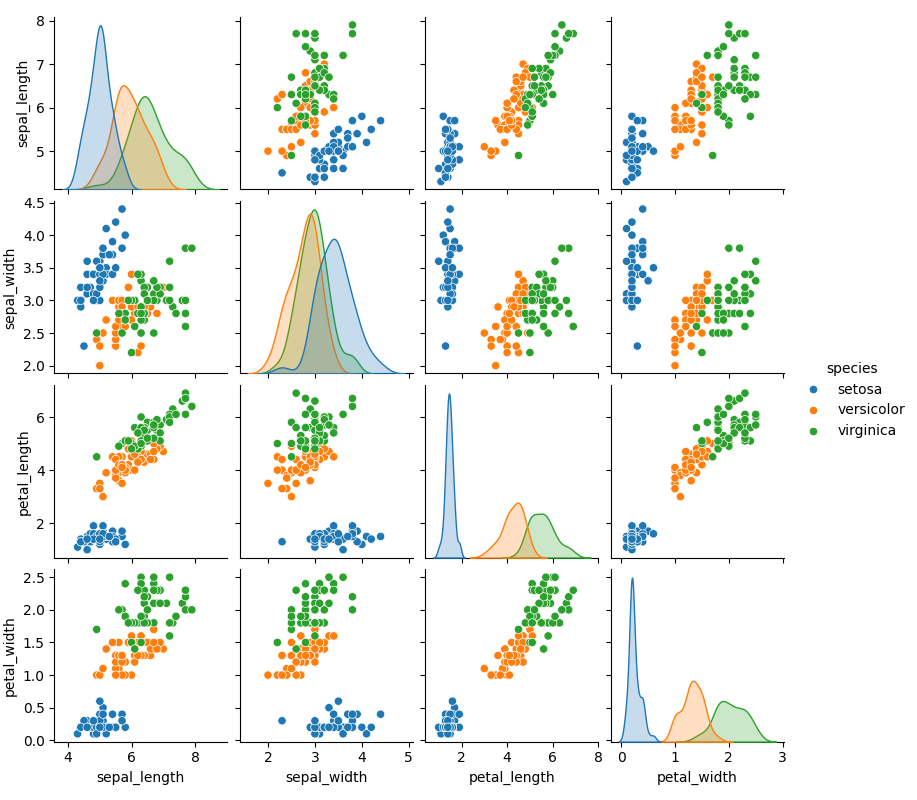

In [7]:
sns.pairplot(data,hue='species',height=2.0)

In [8]:
## To find pearsons coefficient we have to encode the labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['species_encoded'] = label_encoder.fit_transform(data['species'])
data.drop(['species'],axis=1,inplace=True)

In [9]:
data['species_encoded'].unique()

array([0, 1, 2])

In [10]:
## Pearsons coefficient 
data.corr()['species_encoded']

sepal_length       0.782561
sepal_width       -0.426658
petal_length       0.949035
petal_width        0.956547
species_encoded    1.000000
Name: species_encoded, dtype: float64

Clearly Petal_width and petal_length are highly correlated to species 

In [11]:
## Since petal length and width are highly correlated to species lets create a new feature
data['petal_area'] = data['petal_length'] * data['petal_width']
data.corr()['species_encoded']

sepal_length       0.782561
sepal_width       -0.426658
petal_length       0.949035
petal_width        0.956547
species_encoded    1.000000
petal_area         0.950123
Name: species_encoded, dtype: float64

Yup! petal area is another good feature we need for prediction

## Model training


In [12]:
x = data[['petal_width']]

# Since we are only classifying as virginica or non virginica
y = (data['species_encoded']==2).astype(int)

In [13]:
y.unique()

array([0, 1])

In [14]:
## Train test split 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:

from sklearn.linear_model import LogisticRegression
log_regressor = LogisticRegression()
log_regressor.fit(x_train,y_train)


LogisticRegression()

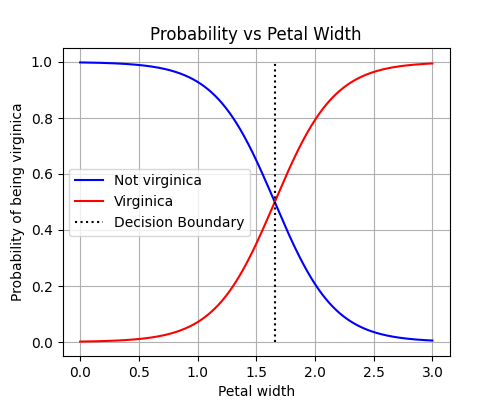

In [16]:
## Model’s estimated probabilities for flowers with petal widths varying
plt.figure(figsize=(5,4))
x_plot = np.linspace(0,3,1000).reshape(-1,1)

#giving x_plot array its 'feature name'
x_plot = pd.DataFrame(x_plot,columns=['petal_width'])
y_plot = log_regressor.predict_proba(x_plot)   #Returns (n_sample,n_classes) probabilities

decision_boundary = x_plot[y_plot[:,1]>=0.5].iloc[0,0]   #First (lowest) point on x-axis for which model is classifying instance as class 1

plt.xlabel("Petal width")
plt.ylabel("Probability of being virginica")
plt.title("Probability vs Petal Width")

plt.plot(x_plot,y_plot[:,0],c='b',label='Not virginica')
plt.plot(x_plot,y_plot[:,1],c='r',label='Virginica')
plt.plot([decision_boundary,decision_boundary],[0,1],c='k',linestyle=":",label="Decision Boundary")
plt.legend()
plt.grid(True)


In [17]:
decision_boundary

np.float64(1.6576576576576576)

In [18]:
log_regressor.predict([[1.6],[1.7]])

c:\Users\Arun\Documents\Documents\Machine_Learning\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 1])